In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
tri_df_file = "patient_priority.csv"
tri_df = pd.read_csv(tri_df_file)

print(tri_df.head())

   Unnamed: 0   age  gender  chest pain type  blood pressure  cholesterol  \
0           0  40.0     1.0              2.0           140.0        294.0   
1           1  49.0     0.0              3.0           160.0        180.0   
2           2  37.0     1.0              2.0           130.0        294.0   
3           3  48.0     0.0              4.0           138.0        214.0   
4           4  54.0     1.0              3.0           150.0        195.0   

   max heart rate  exercise angina  plasma glucose  skin_thickness  insulin  \
0           172.0              0.0           108.0            43.0     92.0   
1           156.0              0.0            75.0            47.0     90.0   
2           156.0              0.0            98.0            53.0    102.0   
3           156.0              1.0            72.0            51.0    118.0   
4           156.0              0.0           108.0            90.0     83.0   

    bmi  diabetes_pedigree  hypertension  heart_disease Reside

In [3]:
tri_df.dtypes

Unnamed: 0             int64
age                  float64
gender               float64
chest pain type      float64
blood pressure       float64
cholesterol          float64
max heart rate       float64
exercise angina      float64
plasma glucose       float64
skin_thickness       float64
insulin              float64
bmi                  float64
diabetes_pedigree    float64
hypertension         float64
heart_disease        float64
Residence_type        object
smoking_status        object
triage                object
dtype: object

In [4]:
tri_df.Residence_type.value_counts()


Urban    4449
Rural    2513
Name: Residence_type, dtype: int64

In [5]:
tri_df.shape

(6962, 18)

In [6]:
tri_df.isnull().any()

Unnamed: 0           False
age                  False
gender                True
chest pain type      False
blood pressure       False
cholesterol          False
max heart rate       False
exercise angina      False
plasma glucose       False
skin_thickness       False
insulin              False
bmi                  False
diabetes_pedigree    False
hypertension         False
heart_disease        False
Residence_type       False
smoking_status       False
triage                True
dtype: bool

In [7]:
tri_df.gender.value_counts()

1.0    3703
0.0    3258
Name: gender, dtype: int64

In [8]:
tri_df.triage.isnull().sum()

410

In [9]:
tri_df.smoking_status.value_counts()

never smoked       3745
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [10]:
tri_df.triage.value_counts()

yellow    5637
green      440
orange     346
red        129
Name: triage, dtype: int64

# Separation

In [11]:
encoder = LabelEncoder()

In [12]:
tri_df.Residence_type = encoder.fit_transform(tri_df.Residence_type)
tri_df.smoking_status = encoder.fit_transform(tri_df.smoking_status)
tri_df['target'] = tri_df.triage.apply(lambda row: 3 if row == "green" else (2 if row == "yellow" else 1))

In [13]:
print(tri_df.head())

   Unnamed: 0   age  gender  chest pain type  blood pressure  cholesterol  \
0           0  40.0     1.0              2.0           140.0        294.0   
1           1  49.0     0.0              3.0           160.0        180.0   
2           2  37.0     1.0              2.0           130.0        294.0   
3           3  48.0     0.0              4.0           138.0        214.0   
4           4  54.0     1.0              3.0           150.0        195.0   

   max heart rate  exercise angina  plasma glucose  skin_thickness  insulin  \
0           172.0              0.0           108.0            43.0     92.0   
1           156.0              0.0            75.0            47.0     90.0   
2           156.0              0.0            98.0            53.0    102.0   
3           156.0              1.0            72.0            51.0    118.0   
4           156.0              0.0           108.0            90.0     83.0   

    bmi  diabetes_pedigree  hypertension  heart_disease  Resid

In [14]:
y = tri_df.target

In [15]:
X = tri_df.drop(columns = ['Unnamed: 0', 'triage', 'target'], axis = 1)

In [16]:
X

,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status
0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.00,43.0,92.0,19.0,0.467386,0.0,0.0,1,2
1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.00,47.0,90.0,18.0,0.467386,0.0,0.0,1,2
2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.00,53.0,102.0,23.0,0.467386,0.0,0.0,1,2
3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.00,51.0,118.0,18.0,0.467386,0.0,0.0,1,2
4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.00,90.0,83.0,21.0,0.467386,0.0,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,80.0,0.0,0.0,111.0,153.0,166.0,0.0,83.75,31.0,108.0,18.6,0.467386,1.0,0.0,1,2
6958,81.0,0.0,0.0,123.0,157.0,160.0,0.0,125.20,23.0,89.0,40.0,0.467386,0.0,0.0,1,2
6959,81.0,0.0,0.0,127.0,185.0,141.0,0.0,82.99,41.0,95.0,30.6,0.467386,0.0,0.0,0,2
6960,51.0,1.0,0.0,123.0,161.0,162.0,0.0,166.29,34.0,93.0,25.6,0.467386,0.0,0.0,0,1


In [17]:
numerical_columns = ['age', 'blood pressure', 'cholesterol', 'max heart rate', 'plasma glucose', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree']
X.gender = X.gender.replace(np.NAN, 0.0)
noise = np.random.normal(0, 1, len(X))
trainingset = X
from sklearn.preprocessing import StandardScaler
# Standardize the numerical features
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


In [18]:

# Assuming trainingset and y are already defined
# Make sure all values in trainingset are non-negative
# You can use np.abs() to take the absolute values or add a constant value, for example, 1.
dep_non_negative = np.abs(trainingset)

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(dep_non_negative, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(trainingset.columns)

# Concatenate two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # Naming the dataframe columns
print(featureScores.nlargest(20, 'Score'))  # Print 10 best features

                Specs        Score
7      plasma glucose  2398.841257
2     chest pain type   914.743800
11  diabetes_pedigree   593.357768
12       hypertension   108.854420
0                 age    80.555261
6     exercise angina    71.210622
4         cholesterol    70.553356
13      heart_disease    49.991681
14     Residence_type    17.821723
1              gender    17.361758
15     smoking_status     8.984023
3      blood pressure     5.440520
10                bmi     5.198048
9             insulin     3.716324
8      skin_thickness     0.686937
5      max heart rate     0.121132


In [19]:
trainingset = trainingset.drop(columns= ['plasma glucose', 'diabetes_pedigree', 'exercise angina', 'heart_disease', 'skin_thickness', 'max heart rate'])

In [20]:
trainingset.head()

,age,gender,chest pain type,blood pressure,cholesterol,insulin,bmi,hypertension,Residence_type,smoking_status
0,-1.465884,1.0,2.0,1.410374,3.414412,-1.092901,-1.112539,0.0,1,2
1,-0.709841,0.0,3.0,2.339167,-0.147191,-1.207391,-1.248365,0.0,1,2
2,-1.717898,1.0,2.0,0.945977,3.414412,-0.520451,-0.569234,0.0,1,2
3,-0.793846,0.0,4.0,1.317494,0.915042,0.395469,-1.248365,0.0,1,2
4,-0.289817,1.0,3.0,1.874771,0.321441,-1.608106,-0.840887,0.0,1,2


# Exploratory Analysis

In [21]:
#sns.pairplot(data= tri_df, hue = 'triage')
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='age', ylabel='plasma glucose'>

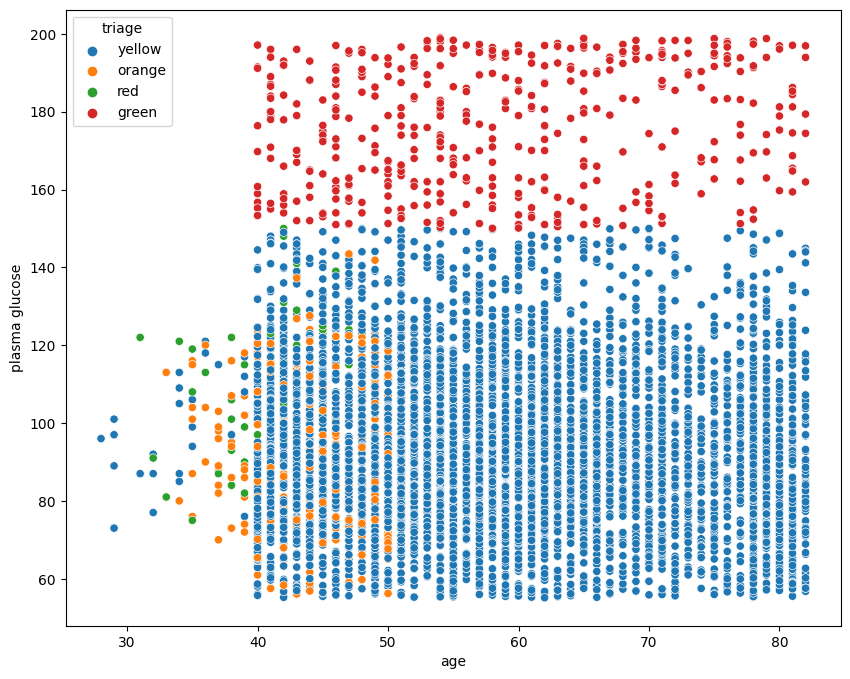

In [22]:
figure = plt.figure(figsize=(10,8))
ax = plt.subplot()
sns.scatterplot(data = tri_df, x = "age", y = "plasma glucose", hue = "triage")

There is some evidence of clustering

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [24]:
import hdbscan

In [25]:
X_train, X_test, y_train, y_test = train_test_split(trainingset, y, test_size= 0.2, random_state= 67)

In [26]:
"""
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

param_grid = {
    'min_cluster_size': np.arange(5, 50),
    'min_samples': np.arange(1, 11)
}

best_score = -1
best_hdbscan_labels = None

# Perform an exploratory approach to find the best hyperparameters using silhouette score
for params in ParameterGrid(param_grid):
    hdbscan_model = hdbscan.HDBSCAN(**params)
    hdbscan_labels = hdbscan_model.fit_predict(X[numerical_columns])
    silhouette_avg = silhouette_score(X[numerical_columns], hdbscan_labels)
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_hdbscan_labels = hdbscan_labels

best_params = hdbscan_model.get_params()

print("Best Hyperparameters:", best_params)
print("Best Silhouette Score:", best_score)

# Add the cluster labels to the DataFrame using the best hyperparameters
X['best_hdbscan_cluster'] = best_hdbscan_labels
"""

'\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.metrics import silhouette_score\nfrom sklearn.model_selection import ParameterGrid\n\nparam_grid = {\n    \'min_cluster_size\': np.arange(5, 50),\n    \'min_samples\': np.arange(1, 11)\n}\n\nbest_score = -1\nbest_hdbscan_labels = None\n\n# Perform an exploratory approach to find the best hyperparameters using silhouette score\nfor params in ParameterGrid(param_grid):\n    hdbscan_model = hdbscan.HDBSCAN(**params)\n    hdbscan_labels = hdbscan_model.fit_predict(X[numerical_columns])\n    silhouette_avg = silhouette_score(X[numerical_columns], hdbscan_labels)\n    if silhouette_avg > best_score:\n        best_score = silhouette_avg\n        best_hdbscan_labels = hdbscan_labels\n\nbest_params = hdbscan_model.get_params()\n\nprint("Best Hyperparameters:", best_params)\nprint("Best Silhouette Score:", best_score)\n\n# Add the cluster labels to the DataFrame using the best hyperparameters\nX[\'best_hdbscan_cluster\'] = b

In [27]:
hdbscan_model.condensed_tree_.plot()

NameError: name 'hdbscan_model' is not defined

In [ ]:
# Initialize the DBSCAN model
dbscan_model = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to the data
dbscan_labels = dbscan_model.fit_predict(X[numerical_columns])

# Add the cluster labels to the DataFrame
X['dbscan_cluster'] = dbscan_labels


In [ ]:
# Initialize the HDBSCAN model
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1)

# Fit the model to the data
hdbscan_labels = hdbscan_model.fit_predict(X[numerical_columns])

# Add the cluster labels to the DataFrame
X['hdbscan_cluster'] = hdbscan_labels


Number of clusters found by DBSCAN: 1
Number of clusters found by HDBSCAN: 3


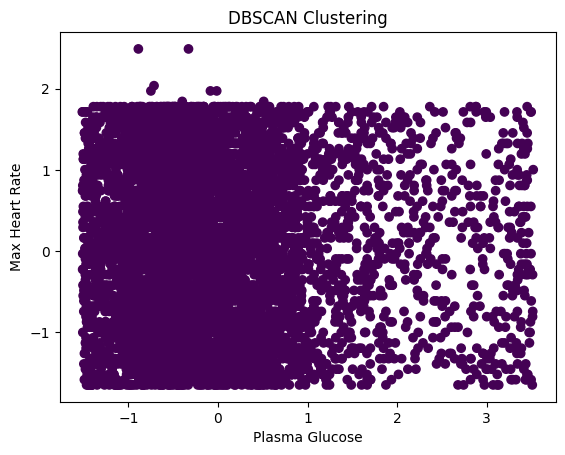

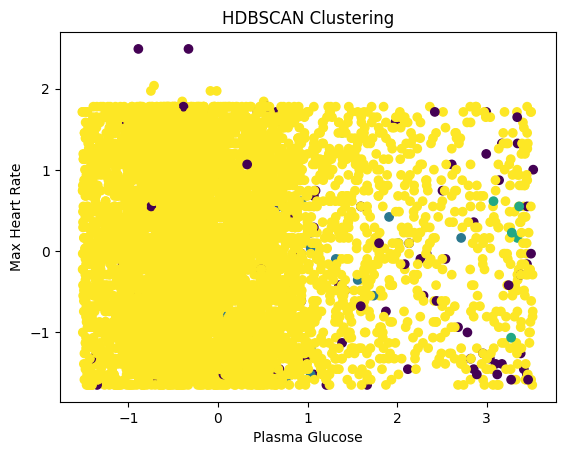

In [ ]:
# Print the number of clusters found by DBSCAN and HDBSCAN
print("Number of clusters found by DBSCAN:", len(np.unique(X['dbscan_cluster'])))
print("Number of clusters found by HDBSCAN:", len(np.unique(X['best_hdbscan_cluster'])))

# Visualize the clusters (you can plot any two numerical features for visualization)
plt.scatter(X['plasma glucose'], X['max heart rate'], c=X['dbscan_cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Plasma Glucose')
plt.ylabel('Max Heart Rate')
plt.show()

plt.scatter(X['plasma glucose'], X['max heart rate'], c=X['hdbscan_cluster'], cmap='viridis')
plt.title('HDBSCAN Clustering')
plt.xlabel('Plasma Glucose')
plt.ylabel('Max Heart Rate')
plt.show()


In [28]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Example: Evaluate clustering performance with ground truth labels
ground_truth_labels = y
ari = adjusted_rand_score(ground_truth_labels, X['best_hdbscan_cluster'])
nmi = normalized_mutual_info_score(ground_truth_labels, X['best_hdbscan_cluster'])
print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)


KeyError: 'best_hdbscan_cluster'

# Supervised Models

In [29]:
forest = RandomForestClassifier(random_state=5)
forest_fit = forest.fit(X_train, y_train)
forest_predict = forest_fit.predict(X_test)
accuracy_score(y_test, forest_predict)

0.9396984924623115

In [30]:
new_values = {}
for value in forest_predict:
    if value not in new_values:
        new_values[value] = 1
    else:
        new_values[value] += 1

print(new_values)

{2: 1206, 1: 186, 3: 1}


In [31]:
vector = SVC(random_state=32)
vector.fit(X_train, y_train)
vector_predictions = vector.predict(X_test)
accuracy_score(y_test, vector_predictions)

0.9073941134242641